# Tutorial 2 - MLP

O objetivo final deste tutorial é mostrar como podemos implementar uma MLP (*Multilayer Perceptron*) no Tensorflow. No entanto, para ajudar a entender um pouco como funciona o Tensorflow vamos implementar primeiro uma rede mais simples (a Perceptron, que possui uma camada apenas) e, em seguida, iremos implementar a MLP. 

A implementção é baseada no Cap. 3 do livro do [Redes Neurais Artificiais Para Engenharia e Ciências Aplicadas](https://artliber.com.br/index.php?route=product/product&product_id=77) do professor Ivan Nunes e no tutorial [Elementary Neural Networks with TensorFlow](https://medium.com/@jaschaephraim/elementary-neural-networks-with-tensorflow-c2593ad3d60b#.40xi9im8s).

## Rede Perceptron

A rede perceptron é a forma mais simples de configuração de uma rede neural artificial. A arquitetura da rede se aproxima daquela que foi apresentada no problema de regressão linear do Tutorial 1. 

A imagem a seguir mostra a arquitetura da rede perceptron. 

<img src="https://www.embarcados.com.br/wp-content/uploads/2016/09/Perceptron-01.png" width="50%" />



A rede é construída a partir de $n$ sinais de entrada e uma única saída, já que ela possui somente um neurônio. Mais detalhes de como a rede perceptron funciona, pode ser encontrado no vídeo a seguir:

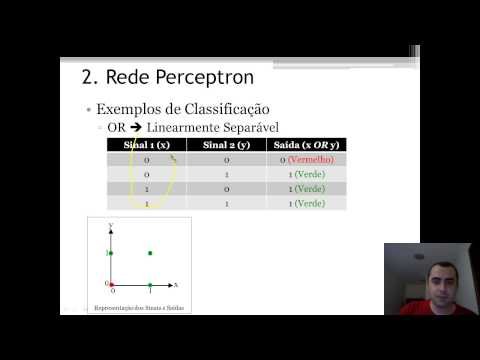

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('pkAKtL9FvFI')

A rede perceptron é utilizada em problemas que são ditos linearmente separáveis. Entende-se por esse tipo de problema aqueles que são compostos por dados que podem ser separados por uma função linear. Para isso, vamos criar um conjunto de dados que possuem tal característica. Como o propósito é só mostrar o funcionamento da rede, vamos criar um conjunto de dados sem nenhum próposito específico.

Os dados de entrada são constituídos de várias instâncias contendo duas variáveis cada ($x_1$ e $x_2$) e cada instância é classificada em 0 ou 1. Sendo assim, a tarefa da rede é aprender um modelo que seja capaz de separar estas duas classes. O código a seguir cria os dados e os exibem em um gráfico. 

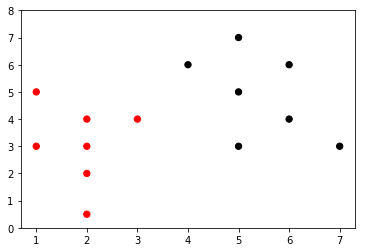

In [2]:
import numpy as np
import matplotlib.pyplot as plt


#Criando os dados de entrada (x = features e y = classes)
x_train = np.array([[2., 2.],[1., 3.],[2., 3.],[5., 3.],[7., 3.],[2., 4.],[3., 4.],[6., 4.],
                    [1., 5.],[2., .5],[5., 5.],[4., 6.],[6., 6.],[5., 7.]],dtype="float32")
y_train = np.array([[0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1.]], dtype="float32")

#Mostrando o Gráfico
A = x_train[:, 0]
B = x_train[:, 1]

colormap = np.array(['r', 'k'])

# Plot the original data
plt.scatter(A, B, c=colormap[[0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1]], s=40)

plt.ylim([0,8]) # Limit the y axis size
plt.show()

O próximo passo é criar a seguinte rede no Tensorflow.

<img src="https://www.embarcados.com.br/wp-content/uploads/2016/09/Perceptron-01.png" width="50%" />

Observe que a rede é composta por um conjunto de sinais de entrada ($x_{train} = [x_1, x_2, ..., x_n]$). Cada sinal é poderado por um peso w, dado por $weights = [w_1, w_2, ..., w_3]$ e somado por um limiar de ativação ($\theta$). Sendo assim, o neurônio é representado pela seguinte operação: 

$u = \sum_{i=1}^{n}{w_i*x_i} + bias$

O valor inicial do $bias$ é dado por $-\theta$. Neste exemplo, $\theta = 1$.

O valor de $u$ é entrada para uma função de ativação ($g$) gerando o sinal de saída $y=g(u)$.

Nesse exemplo, a função de ativação é dada por: 

$g(u) = 1$, se $u >= 0$

$g(u) = 0$, se $u < 0$

O código a seguir implementa esse modelo. Mais detalhes são dados nos comentários do código.

In [3]:
# imports necessários

import tensorflow as tf

In [4]:
# Função de ativação
def output(u):
    is_greater = tf.greater(u, 0)
    as_float = tf.to_float(is_greater)
    return as_float

In [5]:
'''
Criação do array que representa o limiar. O limiar é inicializado com -1. Neste caso, o limiar representa um vetor 
14x1, ou seja, é atribuído um limiar para cada valor de entrada (no caso, 14).
'''
limiar_array = np.ones([14,1], dtype="float32")*(-1)
limiar = tf.Variable(limiar_array, name="limiar")

'''
Criação da variável com pesos. Como estamos trabalhando com dois valores de entrada por instância, os pesos são 
instanciados por um vetor 2x1
'''
weights = tf.Variable(tf.random_normal([2,1]), name="pesos")

# Placeholders para feed dos dados de entrada e saída
X = tf.placeholder(tf.float32, x_train.shape)
Y = tf.placeholder(tf.float32, y_train.shape)

# Modelo criado 
u = tf.matmul(x_train,weights) + limiar

# Aplicação da função de ativação
output_value = output(u)

Modelo criado. A próxima etapa é definir como nosso modelo será treinado. 

Este problema é uma tarefa de classificação. Cada instância vai ser classificada como 0 ou 1 de acordo com a classe que pertence. Sendo assim, o primeiro passo é comparar a saída com a classificação da base de treinamento. Para isso foi calculado o erro da seguinte forma:

$mse = \sum_{i = 1}^{N}{(y_i - output_i)^2}$

O objetivo do treinamento é reduzir esse erro. Isso é dado pelo código a seguir:

In [6]:
error = tf.subtract(y_train.T, output_value)
mse = tf.reduce_sum(tf.square(error))

Um outro passo do treinamento é a atualização dos valores dos pesos e do limiar. Esses parâmetros são atualizados segundo fórmula descrita no livro do Ivan Nunes. 

$w_{i}^{atual} = w_{i}^{anterior} + \eta (d^{(k)} - y).x_{i}^{(k)}$

$\theta_{i}^{atual} = \theta_{i}^{anterior} + \eta (d^{(k)} - y).(-1)$

onde:

$d^{(k)}$ é o valor desejado e $y$, o valor de saída produzido pela perceptron. Essa diferença é representada pelo que chamamos de erro no código anterior. $\eta$ é uma constante que define a taxa de aprendizagem da rede (no código, vamos referenciar $\eta$ por *learning_rate*).

In [7]:
learning_rate = 0.001

delta_w = tf.matmul(x_train, learning_rate*error, transpose_a=True)
delta_limiar = tf.matmul(limiar, learning_rate*error, transpose_a=True)

train_w = tf.assign(weights, tf.add(weights, delta_w))
train_limiar = tf.assign(limiar, tf.add(limiar, delta_limiar))

Uma vez que criamos o modelo, vamos executar as operações para treina-lo.

In [8]:
init_op = tf.global_variables_initializer()

sess = tf.Session()

sess.run(init_op)

for step in range(5000):
    _, _, a, b, c = sess.run([train_w, train_limiar, mse, weights, limiar], feed_dict={X: x_train, Y: y_train})
    
print("Weights")
print(b)
print("Limiar", c[0][0])

Weights
[[ 0.24686992]
 [ 0.03673019]]
Limiar -0.894671


O código a seguir apenas cria a função determinada pelos pesos e limiar achados pela rede e plota essa reta no gráfico dos dados mostrado anteriormente.

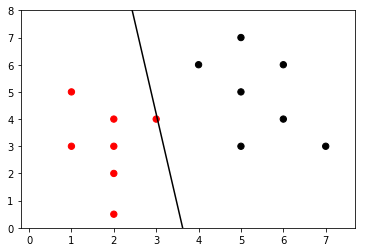

In [9]:
#Graphic display
import matplotlib.pyplot as plt

A = x_train[:, 0]
B = x_train[:, 1]

colormap = np.array(['r', 'k'])

# Plot the original data
plt.scatter(A, B, c=colormap[[0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1]], s=40)

ymin, ymax = plt.ylim()

# Calc the hyperplane (decision boundary)
ymin, ymax = plt.ylim()
w = b
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (c[0,0]) / w[1]
 
# Plot the hyperplane
plt.plot(xx,yy, 'k-')
plt.ylim([0,8]) # Limit the y axis size
plt.show()

# Multilayer Perceptron

Uma rede perceptron multicamadas (*Multilayer Perceptron - MLP*) é caracterizada pela presença de pelo menos uma camada intermediária (escondida ou *hidden layer*) de neurônios, situada entre a camada de entrada e a respectiva camada neural de saída. Sendo assim, as MLP possuem pelo menos duas camadas de nurônios, o quais estarão distribuídos entre as camadas intermediárias e a camada de saída. 

A figura a seguir ilustra este modelo.

<img src="https://elogeel.files.wordpress.com/2010/05/050510_1627_multilayerp1.png" />

Detalhes deste modelo podem ser encontrados no [capítulo 6](http://www.deeplearningbook.org/contents/mlp.html) do [Deep Learning Book](http://www.deeplearningbook.org). Uma outra boa referência é o livro [Redes Neurais Artificiais Para Engenharia e Ciências Aplicadas](https://artliber.com.br/index.php?route=product/product&product_id=77) do professor Ivan Nunes. O tema é abordado no capítulo 5.

Para mostrar este modelo vamos utilizar o exemplo disponível em [neste link](http://www.jessicayung.com/explaining-tensorflow-code-for-a-multilayer-perceptron/) com a base do MNIST para treinar o modelo criado.

Antes de começar a entrar em detalhes da rede, vamos baixar a base do MNIST que será utilizada. O MNIST é um dataset de dígitos escritos a mão. A tarefa consiste em dada uma imagem que representa um dígito escrito à mão classifica-la de acordo com o dígito que foi escrito. Detalhes da base podem ser encontrados [neste link](http://yann.lecun.com/exdb/mnist/). Por ser uma base bastante utilizada, a API do tensorflow já possui a base em um pacote do framework.

In [10]:
# Carregando a base. Se a base não existir a pasta "dataset/MNIST" será criada e a base salva nesta pasta.

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("dataset/MNIST", one_hot=True)

Extracting dataset/MNIST/train-images-idx3-ubyte.gz
Extracting dataset/MNIST/train-labels-idx1-ubyte.gz
Extracting dataset/MNIST/t10k-images-idx3-ubyte.gz
Extracting dataset/MNIST/t10k-labels-idx1-ubyte.gz


Cada imagem do dataset possui o tamanho de 28x28 e representa um dígito escrito à mão. A imagem a seguir ilustra uma instância da base:

<img src="https://www.tensorflow.org/images/MNIST-Matrix.png" width="70%" />

As imagens vão ser transformadas em um vetor de 784 posições ($28*28$). A entrada da rede são vários vetores deste tipo. Cada vetor vai representar uma imagem. A saída da rede é definida por um vetor de 10 posições, onde cada posição representa uma possível classe do dígito (a base do MNIST trabalha com dígitos de 0 a 9).

Se considerarmos que a base de treinamento possui 55000 imagens, as imagens a seguir representam a entrada e saída da rede, respectivamente:

<img src="https://www.tensorflow.org/images/mnist-train-xs.png" width="50%" />
<img src="https://www.tensorflow.org/images/mnist-train-ys.png" width="50%"/>

A diferença desta representação para o modelo que será implementado aqui é que o nosso modelo será alimentado por *batch*. Uma breve explicação do que é *batch* no tensorflow pode ser encontrado [neste link](http://stackoverflow.com/questions/41175401/what-is-a-batch-in-tensorflow). Vamos utilizar um batch de 100. 

Explicações dadas, vamos para o modelo que será implementado.

Jessica Yung em seu tutorial [Explaining TensorFlow code for a Multilayer Perceptron](http://www.jessicayung.com/explaining-tensorflow-code-for-a-multilayer-perceptron/) faz uma imagem bem representativa do modelo que será implementado: 

<img src="http://i0.wp.com/www.jessicayung.com/wp-content/uploads/2016/12/multilayer-perceptron-drawing.png" />

Uma questão importante no entendimento (e, consequentemente, na implementação) de qualquer modelo de rede neural é entender as dimensões dos dados ao passar por cada camada. A imagem anterior deixa isso bem claro. Por isso, vamos analisar camada por camada para que possamos entender como essas dimensões são modificadas. Na imagem, h1 e h2 são a quantidade de neurônios nas camadas intermediárias. A quantidade de neurônios de uma camada é que indica a dimensão da saída daquela camada. Outra informação importante é o tamanho do *batch* (já explicado anteriormente).

Com o batch igual a 100, a rede está recebendo como entrada uma matriz de 100x784, onde 784 é quantidade de pixel de cada imagem. Sendo assim, cada linha dessa matriz representa uma imagem da base de treinamento. Isso é passado para a primeira camada, onde será aplicada a seguinte operação $xW_1 + b_1$ onde, $W_1$ são os pesos de entrada e $b_1$, o *bias*. A imagem a seguir detalha esta operação juntamente com suas dimensões: 

<img src="http://adolfo.data2learning.com/ludiico/images/mlp_dimensions1.png" width="70%" />

A saída da primeira camada é uma matriz 100x256, ou seja, 100 que representa a quantidade de instâncias que foram passadas na entrada e 256, a quantidade de neurônios. Ou seja, cada neurônio processou cada imagem e deu como resultado uma representação própria da entrada poderada pela operação definida. Ao resultado será aplicada uma função de ativação do tipo *RELU* (acesse o [tutorial da Jessica Yung](http://www.jessicayung.com/explaining-tensorflow-code-for-a-multilayer-perceptron/) para ver detalhes do funcionamento deste tipo de função).

A entrada da segunda rede é uma matriz 100x256 (saída da camada anterior). As operações e dimensões da segunda camada são detalhadas na imagem a seguir:

<img src="http://adolfo.data2learning.com/ludiico/images/mlp_dimensions2.png" width="70%" />

Assim, como na primeira camada, a saída é uma matriz 100x256 que será aplicada uma função de atividação do tipo *RELU*. A camada de saída recebe os dados da segunda e gera como saída uma vetor que represente as 10 classes. Nesse caso, a saída será de 100x10, por conta do *batch*. Em outras palavras, estamos gerando um vetor que pesa cada possível classe para cada uma das 100 instâncias passadas como entrada. A imagem ilustra as operações e dimensões da camada de saída.

<img src="http://adolfo.data2learning.com/ludiico/images/mlp_dimensions3.png" width="70%" />

À saída da rede é aplicada a função Softmax que transforma os valores dos vetores em probabilidades. A posição que possuir o maior valor de probabilidade representa a classe à qual o dígito pertence. 

Uma rápida explicação de como funciona a softmax pode ser encontrada no vídeo a seguir:

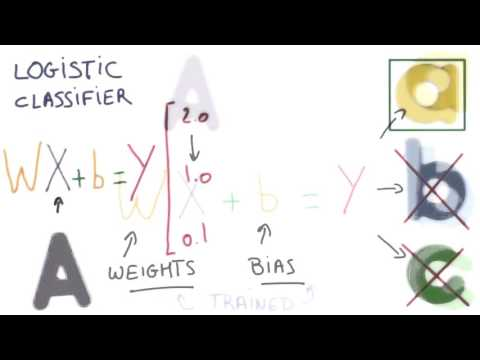

In [11]:
YouTubeVideo('G8eNWzxOgqE')

Explicado o modelo, vamos para o código.

In [12]:
# Imports necessários

import tensorflow as tf

In [13]:
#Definição de parâmetros
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1


#Parâmetros da rede
n_hidden_1 = 256 # Quantidade de features da primeira camada escondida 
n_hidden_2 = 256 # Quantidade de features da segunda camada escondida
n_input = 784 # Dados de entrada no MNIST (28 * 28 = 784 (quantidade de pixels da imagem))
n_classes = 10 # Número total de classes no MNIST (dígitos de 0-9)

# Instanciação dos Input do Grafo no Tensorflow 

x = tf.placeholder(tf.float32, [None, n_input]) # Irá armazenar os dados de entrada
y = tf.placeholder(tf.float32, [None, n_classes]) #Irá armazenar os dados de saída

O modelo é implementado dentro da função *multilayer_perceptron*. Na função criamos cada camada de acordo com os dados passados. É muito importante que as dimensões das variáveis passadas tenham sido definidas corretamente.

In [14]:
def multilayer_perceptron(x, weights, biases):
    
    # Primeira camada como função de ativação RELU
    
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Segunda camada com funç!ao de ativação RELU
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    #Camada de Saída
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return out_layer

Os pesos e bias utilizados serão armazenados em dois dicionários: weights e biases.

In [15]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

Construindo o modelo:

In [16]:
pred = multilayer_perceptron(x, weights, biases)

Uma vez que o modelo foi criado, podemos treina-lo. O primeiro passo é definir como vai ser calculado o custo da solução e, em seguida, o método que será utilizado para otimizar o modelo. Três métodos são importantes nesta etapa:

* [tf.nn.sofmax_cross_entropy_with_logits](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits)
* [tf.reduce_mean](https://www.tensorflow.org/api_docs/python/tf/reduce_mean)
* [tf.train.AdamOptimizer](https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer)

Detalhes destes métodos podem ser encontrados nos links de cada método. Basicamente, a rede será executada e à saída será aplicada a função softmax para transformar a saída em um vetor de probabilidades. A posição do vetor com maior valor de probabilidade corresponde à classe que a entrada é classificada. Esse resultado é comparado com o resultado esperado em *y* (aprendizado supervisionado) e o custo é calculado. O treinamento será executado com o objetivo de minimizar este custo, ou seja, reduzir a taxa de erro.

In [17]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

O código a seguir executa a etapa de treinamento. Detalhes são dados ao decorrer do código.

In [18]:
# Inicializa as variáveis
init = tf.global_variables_initializer()

# Executa o grafo que representa o modelo construído
with tf.Session() as sess:
    sess.run(init)

    '''
    O ciclo de treinamento é chamado de épocas. Em cada época uma quantidade de dados de entrada (batch) é passada
    como entrada para a rede. Ao final de cada época, os parâmetros são atualizados de acordo com o treinamento e novos
    dados são dados como entrada.
    '''
    for epoch in range(training_epochs):
        
        avg_cost = 0. #Armazena a média do custo calculado
        
        total_batch = int(mnist.train.num_examples/batch_size) # Define o total de épocas: total da base / # batch
        
        # Loop por cada batch
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            
            # Executa as operações de otimização dos parâmetros (backprop) and custo (retorna o valor de erro)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
            
            # Calcula a média do erro
            avg_cost += c / total_batch
            
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
            
    print("Fim do treinamento")
    
    # Testa o modelo
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

    # Calcula a acurácia
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Acurácia:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Epoch: 0001 cost= 157.725429967
Epoch: 0002 cost= 40.376680419
Epoch: 0003 cost= 25.320531252
Epoch: 0004 cost= 17.790744989
Epoch: 0005 cost= 12.857540343
Epoch: 0006 cost= 9.480761866
Epoch: 0007 cost= 7.152568298
Epoch: 0008 cost= 5.300936262
Epoch: 0009 cost= 3.905300876
Epoch: 0010 cost= 2.940291073
Epoch: 0011 cost= 2.288513719
Epoch: 0012 cost= 1.727777079
Epoch: 0013 cost= 1.293939837
Epoch: 0014 cost= 0.945999347
Epoch: 0015 cost= 0.827342668
Fim do treinamento
Acurácia: 0.9416


## Base do noMNIST

A tarefa resolvida anteriormente é relativamente simples, já que a base é bem simples e já foi pré-processada com um próposito bem específico. Pensando nisso é que foi criada uma outra base (**noMNIST**) para o mesmo propósito: classificar dígitos, neste caso dígitos de A-Z. Apessar de parecer com o clássico dataset do MNIST, ele envolve uma tarefa mais complicada e os dados estão "menos limpos" do que os dados do [MNIST](http://yann.lecun.com/exdb/mnist/). Para mais detalhes, acesse o link: http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html.

O primeiro passo é baixar o dataset. Detalhes de como baixa-lo estão disponíveis em: 
https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/udacity/1_notmnist.ipynb 

Neste tutorial, assumimos que o dataset já foi baixado na pasta **dataset/**.

In [19]:
# Imports necessários
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range

In [21]:
#Carrega a base de dados 
pickle_file = 'dataset/notMNIST.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    train_dataset = save['train_dataset']
    train_labels = save['train_labels']
    valid_dataset = save['valid_dataset']
    valid_labels = save['valid_labels']
    test_dataset = save['test_dataset']
    test_labels = save['test_labels']
    del save  # hint to help gc free up memory
    print('Training set', train_dataset.shape, train_labels.shape)
    print('Validation set', valid_dataset.shape, valid_labels.shape)
    print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)


In [22]:
# Formata os dados para as dimensões apropriadas (784)

image_size = 28
num_labels = 10

def reformat(dataset, labels):
    dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
    # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
    labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
    return dataset, labels

train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 784) (200000, 10)
Validation set (10000, 784) (10000, 10)
Test set (10000, 784) (10000, 10)


Vamos utilizar o mesmo método definido anteriormente: **multilayer_perceptron** que recebe como parâmetro os dados de entrada e as variáveis para armazenar os bias e weights.

In [23]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

train_dataset = train_dataset[:10000, :]
train_labels = train_labels[:10000]

new_pred = multilayer_perceptron(train_dataset, weights, biases)

In [24]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=new_pred, labels=train_labels))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

O passo seguinte é treinar o modelo. Observe que diferente do exemplo anterior, neste exemplo vamos trabalhar com a base de treinamento para treinar os dados, a base de validação para testar o modelo ao longo das iterações e ao final testa-lo na base de teste.

In [25]:
# Inicializa as variáveis

training_epochs = 30

init = tf.global_variables_initializer()

# Executa o grafo que representa o modelo construído
with tf.Session() as sess:
    sess.run(init)

    '''
    O ciclo de treinamento é chamado de épocas. Em cada época uma quantidade de dados de entrada (batch) é passada
    como entrada para a rede. Ao final de cada época, os parâmetros são atualizados de acordo com o treinamento e novos
    dados são dados como entrada.
    '''
    for epoch in range(training_epochs):
        
        avg_cost = 0. #Armazena a média do custo calculado
        
        total_batch = int(train_dataset.shape[0]/batch_size) # Define o total de épocas: total da base / # batch
        
        # Loop por cada batch
        for i in range(total_batch):
            
            offset = (i * batch_size) % (train_labels.shape[0] - batch_size)
            
            batch_x = train_dataset[offset:(offset+batch_size), :]
            batch_y = train_labels[offset:(offset+batch_size), :]
            
            # Executa as operações de otimização dos parâmetros (backprop) and custo (retorna o valor de erro)
            _, c, prediction = sess.run([optimizer, cost, new_pred], feed_dict={x: batch_x, y: batch_y})
            
            # Calcula a média do erro
            avg_cost += c / total_batch
            
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
            
            # Acurácia de Treinamento
            correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(train_labels, 1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            print("\tAcurácia Treinamento:", accuracy.eval({x: train_dataset, y: train_labels}))
            
            # Acurácia de Validação
            
            valid_prediction = multilayer_perceptron(valid_dataset, weights, biases)
            correct_valid_prediction = tf.equal(tf.argmax(valid_prediction, 1), tf.argmax(valid_labels, 1))
            accuracy_valid = tf.reduce_mean(tf.cast(correct_valid_prediction, "float"))
            print("\tAcurácia Validação:", accuracy_valid.eval({x: valid_dataset, y: valid_labels}))
            
            
    print("Fim do treinamento")
    
    # Testa o modelo
    test_prediction = multilayer_perceptron(test_dataset, weights, biases)
    correct_test_prediction = tf.equal(tf.argmax(test_prediction, 1), tf.argmax(test_labels, 1))
    accuracy_test = tf.reduce_mean(tf.cast(correct_test_prediction, "float"))
    print("Acurácia:", accuracy_test.eval({x: test_dataset, y: test_labels}))

Epoch: 0001 cost= 459.844535675
	Acurácia Treinamento: 0.7454
	Acurácia Validação: 0.6934
Epoch: 0002 cost= 131.960025024
	Acurácia Treinamento: 0.8222
	Acurácia Validação: 0.7173
Epoch: 0003 cost= 64.530110779
	Acurácia Treinamento: 0.8878
	Acurácia Validação: 0.7241
Epoch: 0004 cost= 29.856194401
	Acurácia Treinamento: 0.9324
	Acurácia Validação: 0.7197
Epoch: 0005 cost= 12.424535551
	Acurácia Treinamento: 0.9677
	Acurácia Validação: 0.7165
Epoch: 0006 cost= 4.536465459
	Acurácia Treinamento: 0.9837
	Acurácia Validação: 0.7184
Epoch: 0007 cost= 1.587553128
	Acurácia Treinamento: 0.9657
	Acurácia Validação: 0.7192
Epoch: 0008 cost= 0.659993879
	Acurácia Treinamento: 0.9959
	Acurácia Validação: 0.7192
Epoch: 0009 cost= 0.337804031
	Acurácia Treinamento: 0.9956
	Acurácia Validação: 0.721
Epoch: 0010 cost= 0.166149430
	Acurácia Treinamento: 0.9965
	Acurácia Validação: 0.7228
Epoch: 0011 cost= 0.229731394
	Acurácia Treinamento: 0.9973
	Acurácia Validação: 0.7228
Epoch: 0012 cost= 0.163499